In [12]:
from tensorflow.keras.datasets import imdb

# Load dataset (top 10,000 words)
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print(f"Training samples: {len(x_train)}, Testing samples: {len(x_test)}")


Training samples: 25000, Testing samples: 25000


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define max sequence length
maxlen = 200  

# Apply padding to make all reviews the same length
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

print(f"Shape of x_train: {x_train.shape}, Shape of x_test: {x_test.shape}")


Shape of x_train: (25000, 200), Shape of x_test: (25000, 200)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Input

# Build the model using Input() instead of input_shape
model = Sequential([
    Input(shape=(maxlen,)),  # First layer to define input shape
    Embedding(input_dim=num_words, output_dim=128),  
    SimpleRNN(64, activation='relu'),  
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,292,417 (4.93 MB)

 Trainable params: 1,292,417 (4.93 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - accuracy: 0.5344 - loss: 1.0863 - val_accuracy: 0.5606 - val_loss: 0.6532
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.6092 - loss: 0.6144 - val_accuracy: 0.5966 - val_loss: 0.6206
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6602 - loss: 0.5564 - val_accuracy: 0.5997 - val_loss: 0.6377
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6775 - loss: 0.5172 - val_accuracy: 0.5648 - val_loss: 0.6697
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6381 - loss: 0.5522 - val_accuracy: 0.6038 - val_loss: 0.6824


In [16]:
model.evaluate(x_test, y_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6082 - loss: 0.6796


[0.682420551776886, 0.6037600040435791]

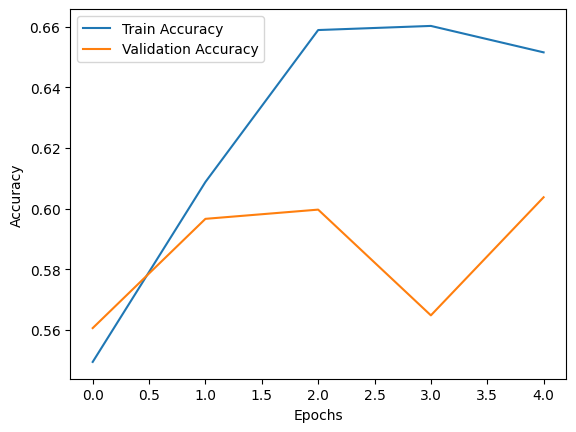

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
